Reference : https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')

In [3]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0684  0.0024  0.0024  0.0024  0.0024  0.0098  0.0024  0.0488   
1       0.0586  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0415   
2       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0391   
3       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0342   
4       0.0488  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366   
...        ...     ...     ...     ...     ...     ...     ...     ...   
471478  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0562   
471479  0.0024  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0513   
471480  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0513   
471481  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0488   
471482  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0439   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0342           0    

In [4]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0684  0.0024  0.0024  0.0024  0.0024  0.0098  0.0024  0.0488   
1       0.0586  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0415   
2       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0391   
3       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0342   
4       0.0488  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366   
...        ...     ...     ...     ...     ...     ...     ...     ...   
471478  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0562   
471479  0.0024  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0513   
471480  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0513   
471481  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0488   
471482  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0439   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0342           0    

In [5]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000
mean,0.153991,0.151130,0.150774,0.053733,0.015006,0.017358,0.260184,0.265908,0.123911,0.079961,2.598087,2.598087,4.777310,4.777310
std,0.313319,0.353818,0.369052,0.184839,0.035486,0.046335,0.519964,0.384472,0.243624,0.166058,3.381989,3.381989,6.598915,6.598915
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.014600,0.068400,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.026900,0.002400,0.002400,0.002400,0.002400,0.002400,0.061000,0.124500,0.048800,0.041500,0.000000,0.000000,0.000000,0.000000
75%,0.151400,0.129400,0.109900,0.026900,0.004900,0.004900,0.256300,0.305200,0.148900,0.070800,5.000000,5.000000,9.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.231000,10.000000,10.000000,23.000000,23.000000


In [6]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# ANOVA f-test Feature Selection

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [8]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [10]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3800.290211
Feature 1: 4019.063614
Feature 2: 7445.697159
Feature 3: 4406.720898
Feature 4: 4452.184159
Feature 5: 2161.322266
Feature 6: 4674.603769
Feature 7: 4944.555505
Feature 8: 1967.398723
Feature 9: 2311.734674


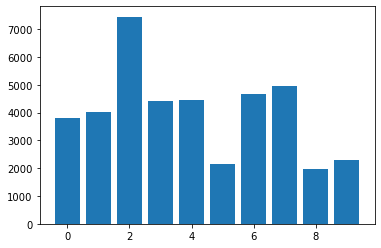

In [11]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()